### Keypoints
learn 
- fastjmd95
- pcolormesh to make geomap
- xrft to calculate PSD

In [1]:
import dask
dask.config.set({"logging.distributed": "warning"})

In [2]:
# !pip install xgcm --upgrade

In [3]:
# from dask_gateway import GatewayCluster
# from dask.distributed import Client
# cluster = GatewayCluster()
# cluster.scale(5)
# client = Client(cluster)
# cluster

In [4]:
# Load some useful modules 
import numpy as np
import xarray as xr
import xrft
import intake
from xmitgcm import llcreader
from matplotlib import pyplot as plt
import dask.array as da
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [6]:
# Trillion element array of ones, in 1000 by 1000 blocks
x = da.ones((1000000, 1000000), chunks=(1000, 1000))

da.exp(x)[:1500, :1500]

dask.array<getitem, shape=(1500, 1500), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [7]:
a = da.ones((4, 10000, 10000), chunks=(1, -1, -1))

In [8]:
a[[0, 1], :, :]          

dask.array<getitem, shape=(2, 10000, 10000), dtype=float64, chunksize=(1, 10000, 10000), chunktype=numpy.ndarray>

In [9]:
dask.config.set({"array.slicing.split_large_chunks": True})

In [10]:
a[[0] * 15, :, :]

dask.array<getitem, shape=(15, 10000, 10000), dtype=float64, chunksize=(1, 10000, 10000), chunktype=numpy.ndarray>

In [11]:
# with dask.config.set(**{'array.slicing.split_large_chunks': True}):
#     array[indexer]
#     value = value[(slice(None),) * axis + (subkey,)]

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xgcm

In [13]:
font = {'family' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

In [14]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")

In [15]:
# Get variables from catalog
## load 
sst = cat.LLC4320_SST.to_dask()
sss = cat.LLC4320_SSS.to_dask()

u = cat.LLC4320_SSU.to_dask()
v = cat.LLC4320_SSV.to_dask()

In [16]:
ds = xr.merge([sst, sss, u, v])
ds = llcreader.llcmodel.faces_dataset_to_latlon(ds, metric_vector_pairs=[])

In [17]:
coords = cat.LLC4320_grid.to_dask().reset_coords()
coords = llcreader.llcmodel.faces_dataset_to_latlon(coords)

In [18]:
coords

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_p1: 2,
              time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k_p1     (k_p1) int64 0 1
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables: (12/30)
    CS       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    PHrefC   float32 15.4
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    ...       ...
    rAw      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>

In [22]:
ds

,Array,Chunk
Bytes,7.36 TiB,71.19 MiB
Shape,"(9030, 12960, 17280)","(1, 4320, 4320)"
Count,659191 Tasks,108360 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,7.36 TiB,71.19 MiB
Shape,"(9030, 12960, 17280)","(1, 4320, 4320)"
Count,659191 Tasks,108360 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [21]:
SST_sel = ds.SST.isel(i=slice(2800, 3400,1),j=slice(4700,5200,1))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


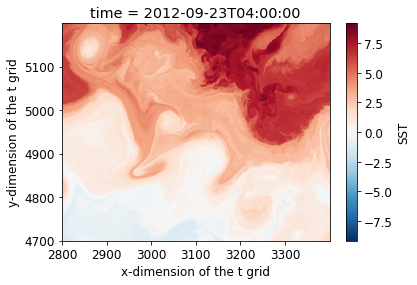

In [22]:
SST_sel.isel(time=-2).plot()

In [23]:
SSS_sel = ds.SSS.isel(i=slice(2800, 3400,1),j=slice(4700,5200,1))

In [24]:
SSS_sel

<xarray.DataArray 'SSS' (time: 9030, j: 500, i: 600)>
dask.array<getitem, shape=(9030, 500, 600), dtype=float32, chunksize=(1, 500, 600), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00

In [25]:
from fastjmd95 import rho
ds['SSD'] = xr.apply_ufunc(rho, 
                        ds.SSS, ds.SST, 0, 
                        dask='parallelized', output_dtypes=[float,]).rename('SSD')

In [26]:
ds

,Array,Chunk
Bytes,7.36 TiB,71.19 MiB
Shape,"(9030, 12960, 17280)","(1, 4320, 4320)"
Count,659191 Tasks,108360 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,7.36 TiB,71.19 MiB
Shape,"(9030, 12960, 17280)","(1, 4320, 4320)"
Count,659191 Tasks,108360 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [27]:
SSD_sel = ds.SSD.isel(i=slice(2800, 3400,1),j=slice(4700,5200,1))

In [28]:
SSD_sel

<xarray.DataArray 'SSD' (time: 9030, j: 500, i: 600)>
dask.array<getitem, shape=(9030, 500, 600), dtype=float64, chunksize=(1, 500, 600), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00

In [29]:
U_sel = ds.U.isel(i_g=slice(2800, 3400,1), j=slice(4700,5200,1))

V_sel = ds.V.isel(i=slice(2800, 3400,1), j_g=slice(4700,5200,1))

In [32]:
# SST_sel.i.values

In [33]:
# pick out the coordinates 

dxC_sel = coords.dxC.isel(i_g=slice(2800, 3400,1), j=slice(4700,5200,1))
dyG_sel = coords.dyG.isel(i_g=slice(2800, 3400,1), j=slice(4700,5200,1))
dyC_sel = coords.dyC.isel(i=slice(2800, 3400,1), j_g=slice(4700,5200,1))
dxG_sel = coords.dxG.isel(i=slice(2800, 3400,1), j_g=slice(4700,5200,1))
rA_sel = coords.rA.isel(i=slice(2800, 3400,1), j=slice(4700,5200,1))
rAz_sel = coords.rAz.isel(i_g=slice(2800, 3400,1), j_g=slice(4700,5200,1))
XC_sel = coords.XC.isel(i=slice(2800, 3400,1), j=slice(4700,5200,1))
YC_sel = coords.YC.isel(i=slice(2800, 3400,1), j=slice(4700,5200,1))

coords_sel = xr.merge([XC_sel, YC_sel, dxC_sel, dyC_sel, dxG_sel,
                      dyG_sel, rA_sel, rAz_sel])

In [34]:
ds_sel = xr.merge([U_sel, V_sel, SST_sel, SSS_sel, SSD_sel])

In [35]:
ds_sel

<xarray.Dataset>
Dimensions:  (j: 500, time: 9030, i_g: 600, i: 600, j_g: 500)
Coordinates:
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i_g      (i_g) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j_g      (j_g) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 500, 600), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 500, 600), meta=np.ndarray>
    SST      (time, j, i) float32 dask.array<chunksize=(1, 500, 600), meta=np.ndarray>
    SSS      (time, j, i) float32 dask.array<chunksize=(1, 500, 600), meta=np.ndarray>
    SSD      (time, j, i) float64 dask.array<chunksize=(1, 500, 600), meta=np.ndarray>

In [36]:
coords_sel

<xarray.Dataset>
Dimensions:  (i: 600, j: 500, i_g: 600, j_g: 500)
Coordinates:
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
  * i_g      (i_g) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j_g      (j_g) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
Data variables:
    XC       (j, i) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    rA       (j, i) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
Attributes:
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [45]:
grid = xgcm.Grid(coords_sel, periodic=None)

In [46]:
grid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center

In [47]:
rho_x = grid.interp(grid.diff(SSD_sel, 'X', boundary='extend')/coords_sel.dxC, 
                    'X',boundary='extend')
rho_y = grid.interp(grid.diff(SSD_sel, 'Y', boundary='extend')/coords_sel.dyC, 
                    'Y',boundary='extend')

In [48]:
grad_rho = np.abs(rho_x) + np.abs(rho_y) 
grad_rho

<xarray.DataArray (time: 9030, j: 500, i: 600)>
dask.array<add, shape=(9030, 500, 600), dtype=float64, chunksize=(1, 500, 600), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
Dimensions without coordinates: time

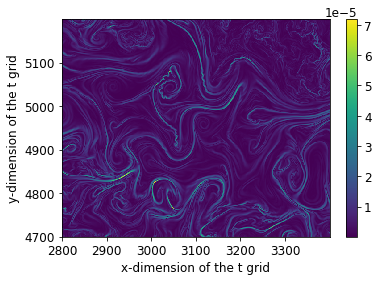

In [106]:
grad_rho.isel(time=2).plot()

In [49]:
# relative volitity
zeta =   (-grid.diff(ds_sel.U * coords_sel.dxC, 'Y', boundary='extend') +
             grid.diff(ds_sel.V * coords_sel.dyC, 'X', boundary='extend')
         )/coords_sel.rAz

zeta = grid.interp(grid.interp(zeta, 'X', boundary='extend'),
                   'Y', boundary='extend')

In [50]:
temp_zeta = zeta.isel(time=0)
temp_zeta.load()

<xarray.DataArray (j: 500, i: 600)>
array([[ 2.4168526e-07,  3.9338261e-06,  6.4985807e-07, ...,
         3.2363002e-06,  9.4328163e-07, -4.2035941e-07],
       [-4.7955546e-06,  9.4858876e-08, -2.1390379e-06, ...,
         6.2444383e-06,  4.7603739e-06,  3.6292920e-06],
       [-6.0777920e-06, -4.7787569e-07, -6.6959331e-08, ...,
         3.5855201e-06,  4.4569829e-06,  4.6554846e-06],
       ...,
       [ 4.9590881e-06,  8.9183086e-06,  1.0475995e-05, ...,
         1.9889285e-05,  2.1728851e-05,  2.2638549e-05],
       [ 5.7328534e-06,  9.1451057e-06,  1.0865556e-05, ...,
         1.7840130e-05,  1.8202823e-05,  1.7039241e-05],
       [ 5.9464292e-06,  9.8005239e-06,  1.1276457e-05, ...,
         1.4438378e-05,  1.3133029e-05,  1.0964093e-05]], dtype=float32)
Coordinates:
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199

In [51]:
temp = grad_rho.isel(time=1000)
temp.load()

<xarray.DataArray (j: 500, i: 600)>
array([[2.32992625e-06, 1.52230728e-06, 4.58774437e-07, ...,
        5.77536837e-07, 1.33650950e-06, 2.71536680e-06],
       [5.14940280e-07, 1.51106683e-06, 5.15501887e-07, ...,
        1.71141262e-06, 7.22331097e-07, 9.13719511e-07],
       [5.08741408e-06, 5.87070629e-06, 3.87509097e-06, ...,
        3.37835946e-06, 3.58298826e-06, 2.24440809e-06],
       ...,
       [5.86032025e-06, 5.92750290e-06, 2.72465998e-06, ...,
        8.79972745e-06, 2.96279088e-06, 1.53441846e-06],
       [4.33885401e-06, 6.34334091e-06, 5.93382480e-06, ...,
        1.18003370e-05, 1.00529929e-05, 4.12214878e-06],
       [2.84835307e-06, 4.86733707e-06, 5.60164669e-06, ...,
        9.46035849e-06, 1.33268710e-05, 9.28643301e-06]])
Coordinates:
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199

In [52]:
XCmean = coords_sel.XC.mean('j')
YCmean = coords_sel.YC.mean('i')

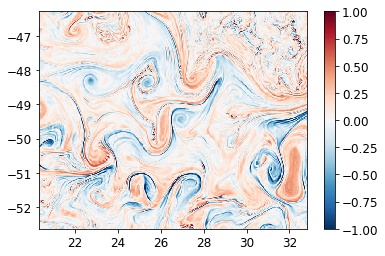

In [53]:
plt.pcolormesh(XCmean, YCmean, temp_zeta/1e-4, 
               vmin=-1, vmax=1, cmap='RdBu_r')
plt.colorbar()

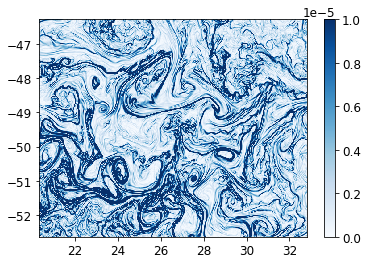

In [54]:
plt.pcolormesh(XCmean, YCmean, temp, 
               vmin=0, vmax=1e-5, cmap='Blues')
plt.colorbar()

In [56]:
SST_seasonal = ds_sel.SST.isel(time=slice(0,24*370, 24*10), i=slice(0,None,10), j=slice(0,None,10)
                             ).groupby("time.month").mean().mean(['i','j'])
SSD_seasonal = ds_sel.SSD.isel(time=slice(0,24*370, 24*10), i=slice(0,None,10), j=slice(0,None,10)
                             ).groupby("time.month").mean().mean(['i','j'])

In [58]:
ds_sel.SST.isel(time=slice(0,24*370, 24*10), i=slice(0,None,10), j=slice(0,None,10)
                             )

<xarray.DataArray 'SST' (time: 37, j: 50, i: 60)>
dask.array<getitem, shape=(37, 50, 60), dtype=float32, chunksize=(1, 50, 60), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 4700 4710 4720 4730 4740 ... 5150 5160 5170 5180 5190
  * time     (time) datetime64[ns] 2011-09-13 2011-09-23 ... 2012-09-07
  * i        (i) int64 2800 2810 2820 2830 2840 ... 3350 3360 3370 3380 3390

In [59]:
SST_seasonal.load();

In [60]:
SSD_seasonal.load();

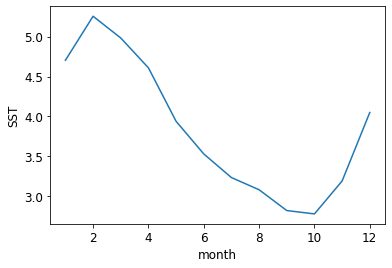

In [61]:
SST_seasonal.plot()

In [62]:
# density
SSD_k_ps = xrft.power_spectrum(ds_sel['SSD'], 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('SSD_psd')

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


In [63]:
# KE 
U_k_ps = xrft.power_spectrum(grid.interp(ds_sel['U'],'X',boundary='extend').chunk({'i':960}), 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('U_psd')

V_k_ps = xrft.power_spectrum(grid.interp(ds_sel['V'],'Y',boundary='extend'), 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('V_psd')

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


In [72]:
U_k_ps

<xarray.DataArray 'U_psd' (time: 9030, j: 500, freq_i: 600)>
dask.array<mul, shape=(9030, 500, 600), dtype=float64, chunksize=(1, 500, 600), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
  * freq_i   (freq_i) float64 -0.5 -0.4983 -0.4967 ... 0.495 0.4967 0.4983
Dimensions without coordinates: time

In [64]:
EKE_k_ps = (0.5*(U_k_ps + V_k_ps)).rename('EKE_psd')

In [66]:
EKE_k_ps

<xarray.DataArray 'EKE_psd' (time: 9030, j: 500, freq_i: 600)>
dask.array<mul, shape=(9030, 500, 600), dtype=float64, chunksize=(1, 500, 600), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
  * freq_i   (freq_i) float64 -0.5 -0.4983 -0.4967 ... 0.495 0.4967 0.4983
Dimensions without coordinates: time

In [92]:
dx = (110*(coords_sel.XC.isel(i=1) - 
            coords_sel.XC.isel(i=0))*np.cos(
            coords_sel.YC.mean('i')*np.pi/180)).mean('j')

In [104]:
EKE_ps_OND = EKE_k_ps.isel(time=slice(0,10*24)).mean('time').mean('j')
EKE_ps_OND
EKE_ps_OND.load()                     

<xarray.DataArray 'EKE_psd' (freq_i: 600)>
array([6.14587452e-07, 6.04534719e-07, 6.01122795e-07, 6.13572681e-07,
       6.24358611e-07, 6.18280101e-07, 6.19358439e-07, 6.27128782e-07,
       6.22682937e-07, 6.25661107e-07, 6.37162497e-07, 6.49180480e-07,
       6.48021011e-07, 6.64494685e-07, 6.85193596e-07, 6.87623285e-07,
       7.01107038e-07, 7.03588728e-07, 7.10754864e-07, 7.21358254e-07,
       7.31292538e-07, 7.42839443e-07, 7.74820324e-07, 7.81509560e-07,
       8.01489959e-07, 8.19163490e-07, 8.38615296e-07, 8.58171844e-07,
       8.76499021e-07, 8.96465012e-07, 9.20598437e-07, 9.45561614e-07,
       9.79852812e-07, 1.00071715e-06, 1.02862440e-06, 1.05716977e-06,
       1.10837903e-06, 1.16406417e-06, 1.16747884e-06, 1.19485416e-06,
       1.24563822e-06, 1.27549338e-06, 1.30008760e-06, 1.37800476e-06,
       1.42110844e-06, 1.44192878e-06, 1.48805676e-06, 1.54762169e-06,
       1.61494612e-06, 1.70764237e-06, 1.74611256e-06, 1.79699893e-06,
       1.84977504e-06, 1.95350215e-06, 1.99608740e-06, 2.03723858e-06,
       2.10209608e-06, 2.18068581e-06, 2.26934817e-06, 2.35263878e-06,
       2.40731444e-06, 2.50125716e-06, 2.59269778e-06, 2.70305189e-06,
       2.84834435e-06, 2.90371665e-06, 3.04251854e-06, 3.13354049e-06,
       3.28085498e-06, 3.39800346e-06, 3.58827269e-06, 3.61081862e-06,
       3.70972613e-06, 3.88175919e-06, 4.02984216e-06, 4.17837490e-06,
       4.34425355e-06, 4.47676559e-06, 4.64072012e-06, 4.86888619e-06,
...
       5.01720384e-06, 4.86888619e-06, 4.64072012e-06, 4.47676559e-06,
       4.34425355e-06, 4.17837490e-06, 4.02984216e-06, 3.88175919e-06,
       3.70972613e-06, 3.61081862e-06, 3.58827269e-06, 3.39800346e-06,
       3.28085498e-06, 3.13354049e-06, 3.04251854e-06, 2.90371665e-06,
       2.84834435e-06, 2.70305189e-06, 2.59269778e-06, 2.50125716e-06,
       2.40731444e-06, 2.35263878e-06, 2.26934817e-06, 2.18068581e-06,
       2.10209608e-06, 2.03723858e-06, 1.99608740e-06, 1.95350215e-06,
       1.84977504e-06, 1.79699893e-06, 1.74611256e-06, 1.70764237e-06,
       1.61494612e-06, 1.54762169e-06, 1.48805676e-06, 1.44192878e-06,
       1.42110844e-06, 1.37800476e-06, 1.30008760e-06, 1.27549338e-06,
       1.24563822e-06, 1.19485416e-06, 1.16747884e-06, 1.16406417e-06,
       1.10837903e-06, 1.05716977e-06, 1.02862440e-06, 1.00071715e-06,
       9.79852812e-07, 9.45561614e-07, 9.20598437e-07, 8.96465012e-07,
       8.76499021e-07, 8.58171844e-07, 8.38615296e-07, 8.19163490e-07,
       8.01489959e-07, 7.81509560e-07, 7.74820324e-07, 7.42839443e-07,
       7.31292538e-07, 7.21358254e-07, 7.10754864e-07, 7.03588728e-07,
       7.01107038e-07, 6.87623285e-07, 6.85193596e-07, 6.64494685e-07,
       6.48021011e-07, 6.49180480e-07, 6.37162497e-07, 6.25661107e-07,
       6.22682937e-07, 6.27128782e-07, 6.19358439e-07, 6.18280101e-07,
       6.24358611e-07, 6.13572681e-07, 6.01122795e-07, 6.04534719e-07])
Coordinates:
  * freq_i   (freq_i) float64 -0.5 -0.4983 -0.4967 ... 0.495 0.4967 0.4983

In [99]:
EKE_ps_AMJ = EKE_k_ps.isel(time=24*30*5).mean('j')
EKE_ps_AMJ.load()    

<xarray.DataArray 'EKE_psd' (freq_i: 600)>
array([2.01669011e-07, 2.05397675e-07, 2.22818198e-07, 2.10637972e-07,
       1.95839402e-07, 2.13186087e-07, 2.27599845e-07, 2.15993367e-07,
       2.09248533e-07, 2.14014985e-07, 2.42213005e-07, 2.37036176e-07,
       2.37568666e-07, 2.45449548e-07, 2.37761995e-07, 2.44480466e-07,
       2.44036182e-07, 2.36022414e-07, 2.30464991e-07, 2.58007585e-07,
       2.60440566e-07, 2.53940085e-07, 2.63749873e-07, 2.72735209e-07,
       2.63529371e-07, 2.71924731e-07, 2.92818589e-07, 2.94371323e-07,
       3.05583409e-07, 3.24056652e-07, 3.31407718e-07, 3.24435347e-07,
       3.36977189e-07, 3.68696761e-07, 4.12829522e-07, 3.59019816e-07,
       3.57175847e-07, 3.88874170e-07, 3.81864780e-07, 3.66823505e-07,
       4.06449453e-07, 4.16522619e-07, 3.95432103e-07, 4.80953524e-07,
       4.98377346e-07, 4.51505103e-07, 4.70042744e-07, 5.13533004e-07,
       4.86185369e-07, 4.66542673e-07, 5.45047177e-07, 5.30557928e-07,
       5.89210014e-07, 6.54846687e-07, 7.02142912e-07, 6.72276127e-07,
       6.52493084e-07, 7.63340622e-07, 7.49831827e-07, 8.38283444e-07,
       8.75246420e-07, 8.73864491e-07, 9.31185937e-07, 9.08250268e-07,
       1.00292786e-06, 9.69967835e-07, 1.04716778e-06, 1.14533051e-06,
       1.17638425e-06, 1.06752292e-06, 1.10754278e-06, 1.27731323e-06,
       1.26787546e-06, 1.37065267e-06, 1.37630015e-06, 1.36101247e-06,
       1.42857416e-06, 1.43418528e-06, 1.53136961e-06, 1.58417922e-06,
...
       1.55741983e-06, 1.58417922e-06, 1.53136961e-06, 1.43418528e-06,
       1.42857416e-06, 1.36101247e-06, 1.37630015e-06, 1.37065267e-06,
       1.26787546e-06, 1.27731323e-06, 1.10754278e-06, 1.06752292e-06,
       1.17638425e-06, 1.14533051e-06, 1.04716778e-06, 9.69967835e-07,
       1.00292786e-06, 9.08250268e-07, 9.31185937e-07, 8.73864491e-07,
       8.75246420e-07, 8.38283444e-07, 7.49831827e-07, 7.63340622e-07,
       6.52493084e-07, 6.72276127e-07, 7.02142912e-07, 6.54846687e-07,
       5.89210014e-07, 5.30557928e-07, 5.45047177e-07, 4.66542673e-07,
       4.86185369e-07, 5.13533004e-07, 4.70042744e-07, 4.51505103e-07,
       4.98377346e-07, 4.80953524e-07, 3.95432103e-07, 4.16522619e-07,
       4.06449453e-07, 3.66823505e-07, 3.81864780e-07, 3.88874170e-07,
       3.57175847e-07, 3.59019816e-07, 4.12829522e-07, 3.68696761e-07,
       3.36977189e-07, 3.24435347e-07, 3.31407718e-07, 3.24056652e-07,
       3.05583409e-07, 2.94371323e-07, 2.92818589e-07, 2.71924731e-07,
       2.63529371e-07, 2.72735209e-07, 2.63749873e-07, 2.53940085e-07,
       2.60440566e-07, 2.58007585e-07, 2.30464991e-07, 2.36022414e-07,
       2.44036182e-07, 2.44480466e-07, 2.37761995e-07, 2.45449548e-07,
       2.37568666e-07, 2.37036176e-07, 2.42213005e-07, 2.14014985e-07,
       2.09248533e-07, 2.15993367e-07, 2.27599845e-07, 2.13186087e-07,
       1.95839402e-07, 2.10637972e-07, 2.22818198e-07, 2.05397675e-07])
Coordinates:
  * freq_i   (freq_i) float64 -0.5 -0.4983 -0.4967 ... 0.495 0.4967 0.4983

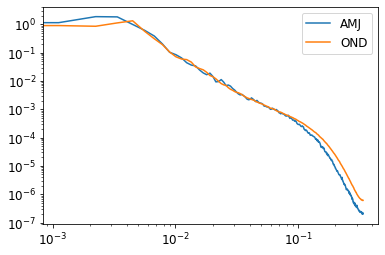

In [105]:
k = EKE_ps_FMA.freq_i/dx

plt.plot(k, EKE_ps_AMJ, label='AMJ')
plt.plot(k, EKE_ps_OND, label='OND')

plt.xscale('log')
plt.yscale('log')
plt.legend()